In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow import keras

#keras model module
from keras.models import Sequential

#ceras core layers
from keras.layers import Dense, Dropout, Activation, Flatten

#cnn layars
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils

#Load image data from MNIST.
from keras.datasets import mnist

from keras.models import save_model, load_model;

#Matplot lib
from matplotlib import pyplot as plt;

import os;
import os.path as path;

import matplotlib.image as mpimg;

# load image and convert to and from NumPy array
from PIL import Image, ImageOps;

2023-04-03 20:55:02.625503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Formating strings
C_FMT_TRAIN_LEN = 'The lenght of the training set {} is {} images.';
C_FMT_TEST_LEN = 'The lenght of the test set {} is {} images';
C_FMT_DATA_DIMM = 'The dimensions of the data are : {}';


C_STR_MODEL_NAME = '/home/kris/Repos/PythonTutorials/Python/Machine learning/notebooks/simple_numbers_1.h5'

In [3]:
#Shows subplot of images for given image list
def ShowGridPlotImgs(imageList, width=20, height=20, columns=10, rows=10):   
    fig=plt.figure(figsize=(8, 8))    
    for i in range(1, columns*rows + 1):        
        fig.add_subplot(rows, columns, i);
        plt.imshow(imageList[i]);
    plt.show();

In [4]:
def TrainSimpleNumbersModel(X_train, y_train, X_test, y_test, debug=True):  
    
    #Show info about traing and testing data
    if( debug ):
        print(C_FMT_TRAIN_LEN.format('X', len(X_train) ) );
        print(C_FMT_TRAIN_LEN.format('y', len(y_train) ) );
        print(C_FMT_TEST_LEN.format('X', len(X_test) ) );
        print(C_FMT_TEST_LEN.format('y', len(y_test) ) );
        print (C_FMT_DATA_DIMM.format(X_train.shape) );
        # (60000, 28, 28)

    print('First 100 train images');
    ShowGridPlotImgs(X_train);
    
    #Reshape input dataPython
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    
    #todo normalize the data
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    if( debug ):
        print('After normailzation');
        print(X_train[0])    
        print(y_train.shape)
        print(y_train[:10])

    # Convert 1-dimensional class arrays to 10-dimensional class matrices
    Y_train = np_utils.to_categorical(y_train, 10);
    Y_test = np_utils.to_categorical(y_test, 10);

    if( debug ): 
        print (Y_train.shape)
    
    #Declare Sequential modelPython
    model = Sequential()

    #CNN input layerPython
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first') )

    print (model.output_shape)
    # (None, 32, 26, 26)
    
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten());
    model.add(Dense(128, activation='relu'));
    model.add(Dropout(0.5));
    model.add(Dense(10, activation='softmax'));

    #Compile modelPython
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']);

    #Fit Keras modelPython
    model.fit(X_train, Y_train, batch_size=32, epochs=3, verbose=1);
    
    #Evalluate keras model
    score = model.evaluate(X_test, Y_test, verbose=0);
    
    if( debug ) : 
        print(score);       

    return model;

/home/kris/Repos/PythonTutorials/Python/Machine learning/notebooks/simple_numbers_1.h5


2023-04-03 20:56:51.319813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 20:56:51.324510: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Loaded the model :/home/kris/Repos/PythonTutorials/Python/Machine learning/notebooks/simple_numbers_1.h5
------------------------------------------------------
Input testSample type :uint8
Test testSample shape:(10000, 1, 28, 28)
Input testSample  size :7840000
Test testSample :[0]=10000
313/313 [==============================] - 4s 11ms/step
The prediction is : 2


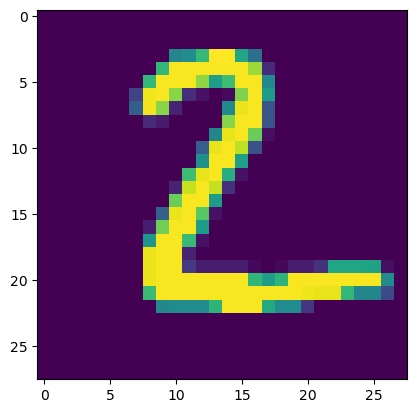

In [5]:
 # Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data();

currModel=0;

#check if there is already traind model with the given name
print(C_STR_MODEL_NAME)
if ( not path.exists(C_STR_MODEL_NAME) ) :
    answer = input('There is no traind model. Do you want to train in now [y/n]?');    
    if( answer != 'y'):
        print ('Exiting now!');
        exit;  

    # Do the model training
    currModel = TrainSimpleNumbersModel( X_train, y_train, X_test, y_test)
    
    answer = input('Do you want to save the trained model now [y\n]?')
    
    if(answer == 'y'):
        save_model(currModel, C_STR_MODEL_NAME);
else:
    currModel = load_model(C_STR_MODEL_NAME);
    print('Loaded the model :' + C_STR_MODEL_NAME);
    
    C_INT_IMG_INDEX = 1;
    
    plt.imshow(X_test[C_INT_IMG_INDEX]);    
    testSample = X_test.reshape(X_test.shape[0], 1, 28, 28)  
   
    print('------------------------------------------------------');
    print('Input testSample type :{}'.format(testSample.dtype) );
    print('Test testSample shape:{}'.format(testSample.shape) );
    print('Input testSample  size :{}'.format(testSample.size) );
    print('Test testSample :[0]={}'.format(testSample.shape[0]));
    prediction = currModel.predict(testSample);   
    
    print('The prediction is : {}'.format( np.argmax(prediction[C_INT_IMG_INDEX]) ) );
    #print('The prediction is : {}'.format(prediction) );

Image path : /home/kris/Repos/PythonTutorials/Python/Machine learning/notebooks/imgs/5_1.png
Original image


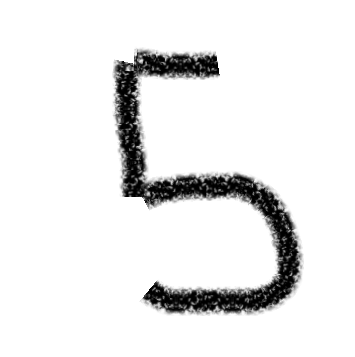

Image new size (28, 28)


------------------------------------------------------
Input img type :uint8
Input img shape :(28, 28)
Input img  size :784
Input img shape :[0]=28


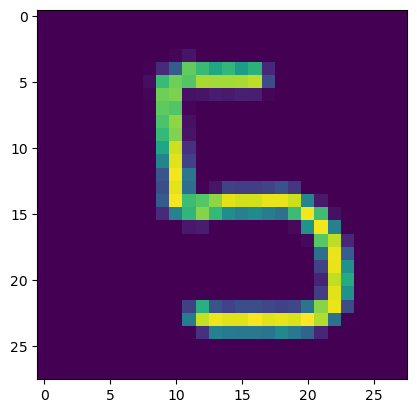

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
The prediction is : 5


In [17]:
#get imag path
absImgPath = os.path.join(os.getcwd(), 'imgs', '5_1.png');
print('Image path : {0}'.format(absImgPath) );

#load image
img_2 = Image.open(absImgPath).convert(mode='L');
print('Original image');
display(img_2);

#Resize the image
img_2 = img_2.resize((28, 28));
img_2 = ImageOps.invert(img_2);
print('Image new size {}'.format(img_2.size))
display(img_2);
print('------------------------------------------------------');


#convet image to mat plot lib array
img2Data = np.asarray(img_2);
#print(img2Data)

#debug
print('Input img type :{}'.format(img2Data.dtype) );
print('Input img shape :{}'.format(img2Data.shape) );
print('Input img  size :{}'.format(img2Data.size) );
print('Input img shape :[0]={}'.format(img2Data.shape[0]));
plt.imshow(img2Data);
plt.show();

#print('------------------------------------------------------');
#print('Input img type :{}'.format(X_test[0].dtype) );
#print('Test shape :{}'.format(X_test[0].shape) );
#print('Input img  size :{}'.format(X_test[0].size) );
#print('Test shape :[0]={}'.format(X_test.shape[0]));
#plt.imshow(X_test[0]);

#https://pillow.readthedocs.io/en/5.1.x/reference/Image.html
img2Data = np.expand_dims(img2Data, -1);
img2Data = img2Data.reshape(1, 1, 28, 28);
#mg2Data = np.expand_dims(mg2Data, axis=0)
mg2Data = img2Data.astype('float32')
#mg2Data /= 255
#plt.imshow(img2Data);

#rint('Input img shape :{}'.format(img2Data.shape) );

#imgplot = plt.imshow(img);
#newPred = currModel.predict(img1);
prediction = currModel.predict(img2Data);
print(prediction);
print('The prediction is : {}'.format( np.argmax(prediction[0]) ) );